In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as transforms
import matplotlib.cm as cm
import helpers
from skimage.feature import peak
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
dataset = helpers.SoccerBallDataset("data/train/data.csv", "data/train", downsample=4)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)

for data in dataloader:
    img = np.array(data['image'][0])
    sgnl = np.array(data['signal'][0])
    img_name = data['img_name'][0]
    boxes = data['boxes']
    break

print("Analyzing: ", img_name)
# print(img.shape)
# print(sgnl.shape)
# print(boxes)

Analyzing:  00228.jpg


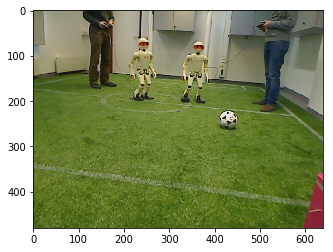

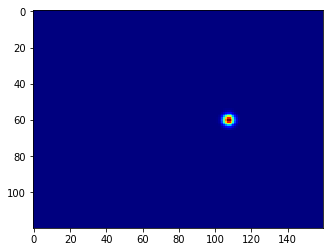

In [3]:
plt.imshow(img.transpose(1, 2, 0))
plt.show()

plt.imshow(sgnl, cmap=cm.jet)
plt.show()

In [11]:
peak.peak_local_max(sgnl, min_distance=1, threshold_rel=0)

array([[ 60, 108],
       [ 60, 107]])

In [12]:
boxes

[[('407', '408', '304', '267'),
  ('219', '220', '306', '91'),
  ('456', '455', '329', '308'),
  ('266', '264', '331', '131')]]

In [13]:
xmin = int(boxes[0][0][0])
ymin = int(boxes[0][1][0])
xmax = int(boxes[0][2][0])
ymax = int(boxes[0][3][0])
c_x = xmin + (xmax - xmin) // 2
c_y = ymin + (ymax - ymin) // 2
print("ymin={}, xmin={}, ymax={}, xmax={}, c_y={}, c_x={}".format(ymin, xmin, ymax, xmax, c_y, c_x))

ymin=219, xmin=407, ymax=266, xmax=456, c_y=242, c_x=431


In [ ]:
xmin + (xmax - xmin)